In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
survey_data = pd.read_csv("../data/evaluation/Major project evaluation form (YouTube data).csv")

In [3]:
df = survey_data.copy()

In [4]:
ratings_transformed_image = df.iloc[:, 2:7] 

In [5]:
ratings = []
ratings.append([list(ratings_transformed_image.iloc[:,i]) for i in range(5)])
ratings = ratings[0]
ratings_list = list(itertools.chain.from_iterable(ratings))


### Survey analysis 1 - Distribution of ratings of an image


/home/abhiyush/anaconda3/envs/mq/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


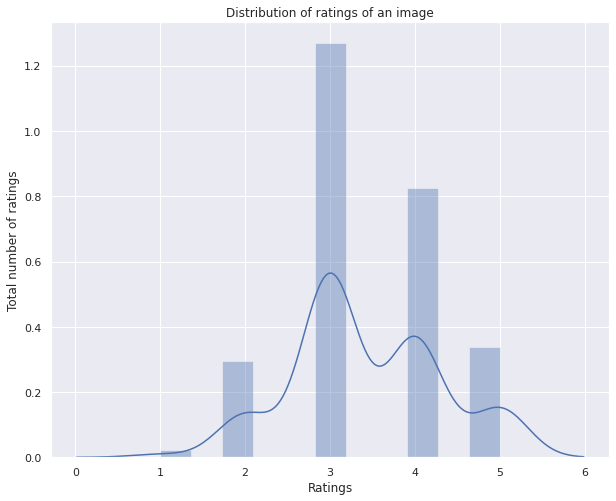

In [6]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (10,8))
fig = sns.distplot(ratings_list, axlabel="Ratings")
plt.xlabel("Ratings")
plt.ylabel("Total number of ratings")
plt.title("Distribution of ratings of an image")
plt.show(fig)
ax.figure.savefig("../evaluation/evaluation_survey_results_analysis/distribution_of_ratings.png")

### Survey_analysis 2


In [7]:
select_df = df.iloc[:, 7:12]

In [8]:
mapping = {
    "Option 1" : 1,
    "Option 2" : 2,
    "Option 3" : 3,
    "Option 4" : 4,
    "None of above" : 5,
}

for i in range(len(select_df.columns)):
    select_df.iloc[:, i] = select_df.iloc[:, i].map(mapping)

In [9]:
select_df

,6) Select the transformed image (Black Hair).,7) Select the transformed image (Blonde Hair).,8) Select the transformed image (Brown Hair).,9) Select the original image,10) Select the original image
0,2,1,2,2,2
1,2,3,3,5,3
2,2,2,3,2,5
3,2,3,2,2,3
4,1,2,3,2,3
5,1,3,3,1,3
6,1,4,1,3,2
7,1,3,3,5,3
8,2,3,3,5,3
9,1,3,3,2,2


In [55]:
df_attributes_summary = pd.DataFrame({
      "name" : select_df.columns,
        "correct_option_position" : [2,3,3,5,3], 
        "subplots" : ["ax1", "ax2", "ax3", "ax4", "ax5"],
        "chart_name" : ['Black hair', "Blonde hair", "Brown hair", "Fake image correctly identified", 
                       "Original image correctly identified"],
        "serial_no" : [0,1,2,3,4]})

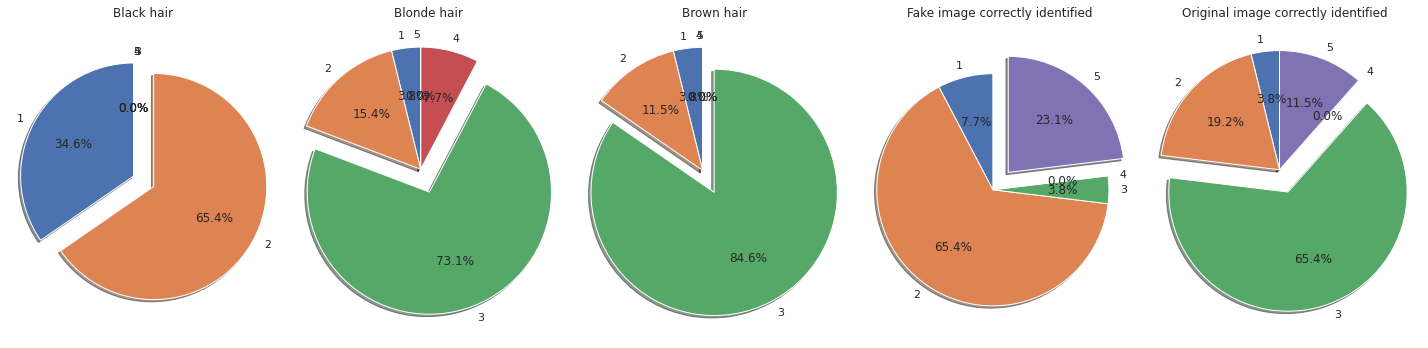

In [36]:
def plot_pie():
    respondents_percentage_correct_option = []
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize = (20,5))

    for index,row in df_attributes_summary.iterrows():
#         print(row['name'])
#         print(row['correct_option_position'])
#         print(row['subplots'])

        survey_data = select_df[row['name']]
        labels = list(survey_data.unique())
        labels.sort()
        percentage = survey_data.value_counts(normalize = True).mul(100).round(4).sort_index()
        percentage = percentage.reindex(list(range(percentage.index.min(),5+1)),fill_value=0)
        percentage = list(percentage)

        correct_option_location = row['correct_option_position']
        labels = [1,2,3,4,5]
#         print(labels)
#         print(percentage)
        sizes = percentage
        explode = np.zeros(len(labels))  # only "explode" the 2nd slice 
        explode_location = labels.index(correct_option_location)
        explode[explode_location] = 0.2
        
        respondents_percentage_correct_option.append(percentage[correct_option_location-1])
#         print(explode)

        eval(row['subplots']).pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        eval(row['subplots']).axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        eval(row['subplots']).title.set_text(row['chart_name'])
    
    plt.tight_layout()
    plt.show()
    fig.savefig("../evaluation/evaluation_survey_results_analysis/pie_chart.png")
    return respondents_percentage_correct_option
respondents_percentage_correct_option = plot_pie()

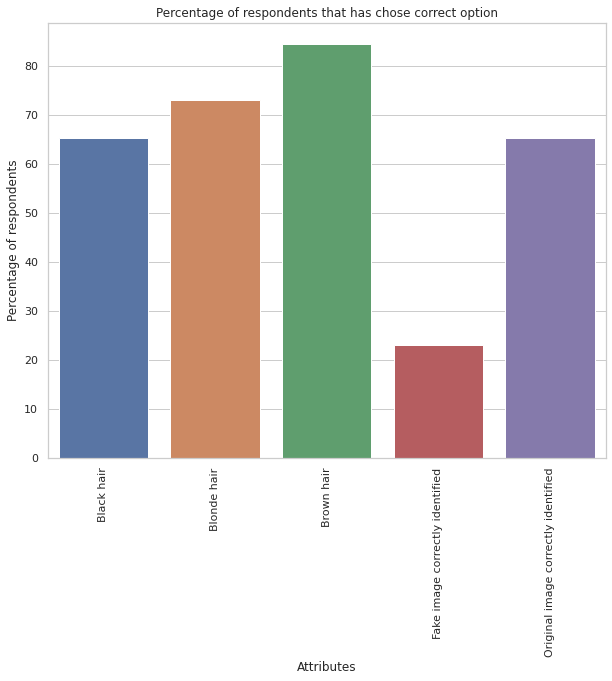

In [37]:
labels = ['Black hair', "Blonde hair", "Brown hair", "Fake image correctly identified", 
                       "Original image correctly identified"]
y = respondents_percentage_correct_option


sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (10,8))

fig = sns.barplot(x=labels, y=respondents_percentage_correct_option)
fig.set_xticklabels(labels, rotation=90)
plt.xlabel("Attributes")
plt.ylabel("Percentage of respondents")
plt.title("Percentage of respondents that has chose correct option")
plt.show(fig)
fig.figure.savefig("../evaluation/evaluation_survey_results_analysis/percentage_of_respondents_correct_option.png")

### Survey analysis 3 - Visual representation of ratings for each attributes

In [39]:
rating_single_attributes = df.iloc[:, 12:]

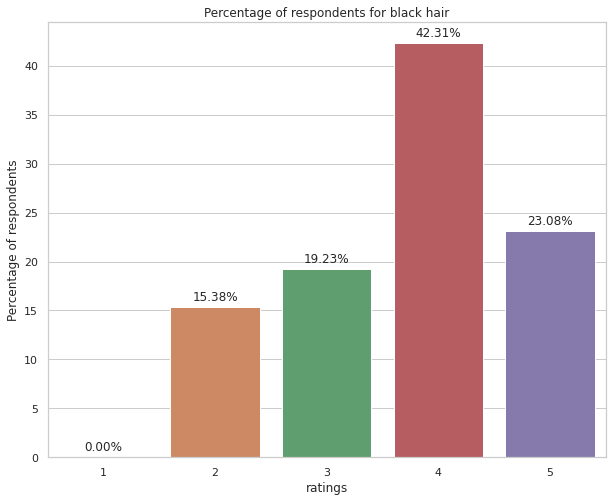

In [64]:
black_hair_rating = rating_single_attributes.iloc[:, 0].value_counts(normalize = True).mul(100).sort_index()
black_hair_rating = black_hair_rating.reindex(list(range(1,5+1)),fill_value=0)

sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize = (10,8))

fig = sns.barplot(x = black_hair_rating.index, y = black_hair_rating.values)
# fig.set_xticklabels(labels, rotation=90)
for p, ratings in zip(fig.patches, black_hair_rating.values):
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 0.7,
            '{:1.2f}%'.format(ratings),
            ha="center") 
    
plt.xlabel("ratings")
plt.ylabel("Percentage of respondents")
plt.title("Percentage of respondents for black hair")
plt.show(fig)
# fig.figure.savefig("../evaluation/evaluation_survey_results_analysis/percentage_of_respondents_correct_option.png")

In [65]:
def bar_chart_single_attributes(attributes_name, serial_number):
    attributes_rating = rating_single_attributes.iloc[:, serial_number].value_counts(normalize = True).mul(100).sort_index()
    attributes_rating = attributes_rating.reindex(list(range(1,5+1)),fill_value=0)

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize = (10,8))

    fig = sns.barplot(x = attributes_rating.index, y = attributes_rating.values)
    for p, ratings in zip(fig.patches, attributes_rating.values):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.7,
                '{:1.2f}%'.format(ratings),
                ha="center") 

    plt.xlabel("ratings")
    plt.ylabel("Percentage of respondents")
    plt.title("Percentage of respondents for " + attributes_name)
    plt.show(fig)
    # fig.figure.savefig("../evaluation/evaluation_survey_results_analysis/percentage_of_respondents_correct_option.png")

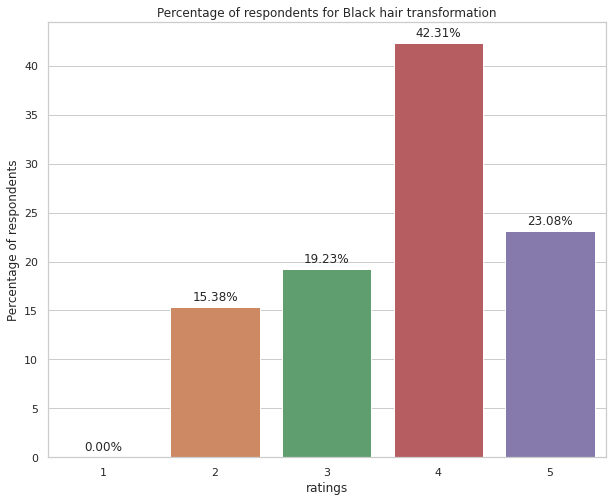

In [75]:
bar_chart_single_attributes("Black hair transformation", 0)    

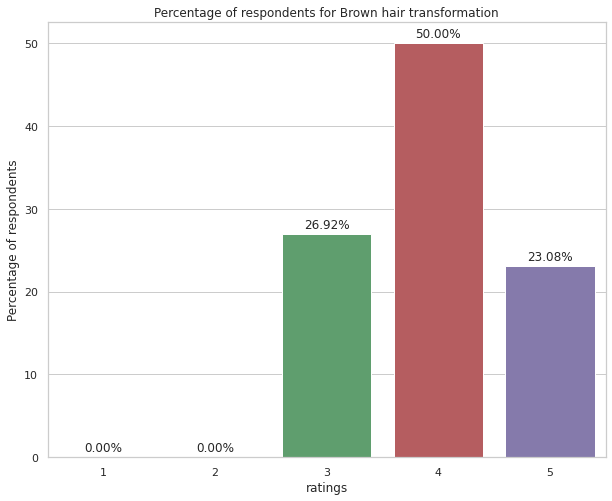

In [76]:
bar_chart_single_attributes("Brown hair transformation", 1)    

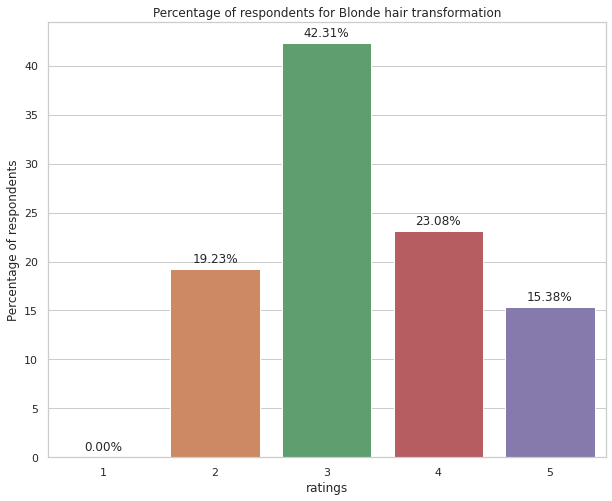

In [77]:
bar_chart_single_attributes("Blonde hair transformation", 2)    

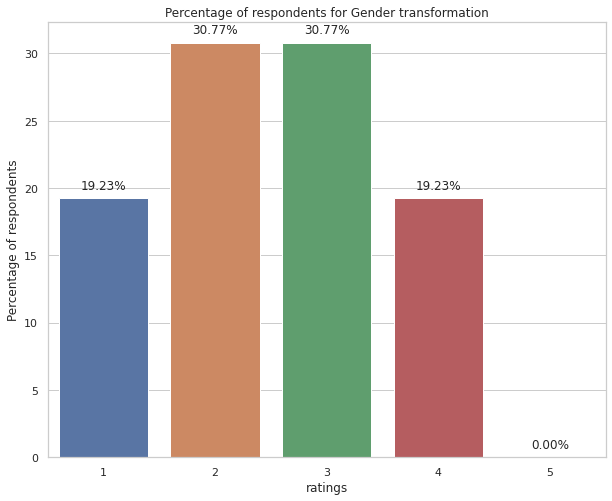

In [78]:
bar_chart_single_attributes("Gender transformation", 3)    

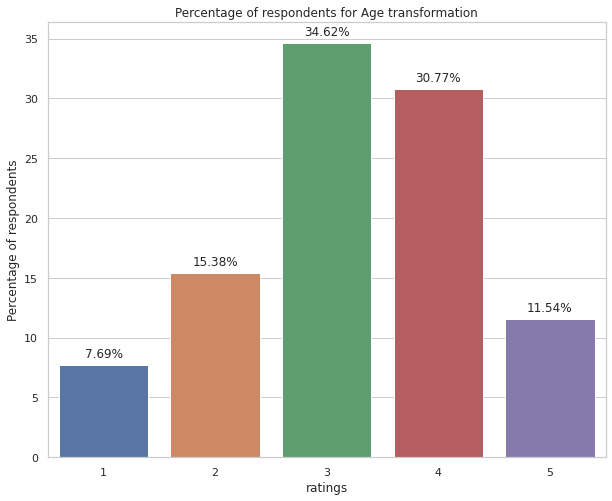

In [79]:
bar_chart_single_attributes("Age transformation", 4)    